<p align="center">
    <img src="JHU.png" width="200" alt="Johns Hopkins University logo">
</p>

# Hands-On Lab: Classification Techniques for Predicting Suicide Risk

Estimated time needed: **60** minutes

### Overview:

This lab focuses on building a classification model to predict high suicide risk using various features. It involves loading and preprocessing the dataset, applying feature engineering techniques, and developing a Random Forest classifier to categorize suicide risk levels. The model's performance is assessed, and feature importance is analyzed to identify the key factors contributing to the predictions.

### Learning Objectives:

- **Understand Data Exploration:** Learn how to examine and visualize data distributions and correlations to gain insights from the dataset.
- **Preprocess Data:** Acquire skills in cleaning and preparing data for machine learning, including handling missing values and encoding categorical variables.
- **Feature Engineering:** Learn how to create and utilize binary target variables for solving classification problems.
- **Build Classification Models:** Develop a Random Forest classifier, understanding the process of training and evaluating the model.
- **Evaluate Model Performance:** Assess model accuracy and interpret evaluation metrics such as confusion matrices and classification reports to understand model effectiveness.

## Building and Evaluating the Classification Model

### Step 1: Data Import and Initial Exploration
In this step, we will import the necessary libraries, load the dataset, and examine its structure. This initial exploration helps us understand the data and prepares us for further analysis.

In [1]:
# Paso 1: Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar el dataset
file_path = 'Suicide Rates.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
df.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
# Load the dataset
file_path = 'Suicide Rates.csv'
df = pd.read_csv(file_path)head()


In [ ]:
# Display the first few rows of the dataset to understand its structure
df.head()

### Step 2. Exploratory Data Analysis (EDA): Visualizing Suicide Rates


In this section, we will start by analyzing the distribution of suicide rates per 100k population, grouped by country, using a boxplot. This visualization will help us understand the variability, spread, and central tendencies of suicide rates across different countries, allowing us to identify any potential outliers and compare suicide rates between nations more effectively.

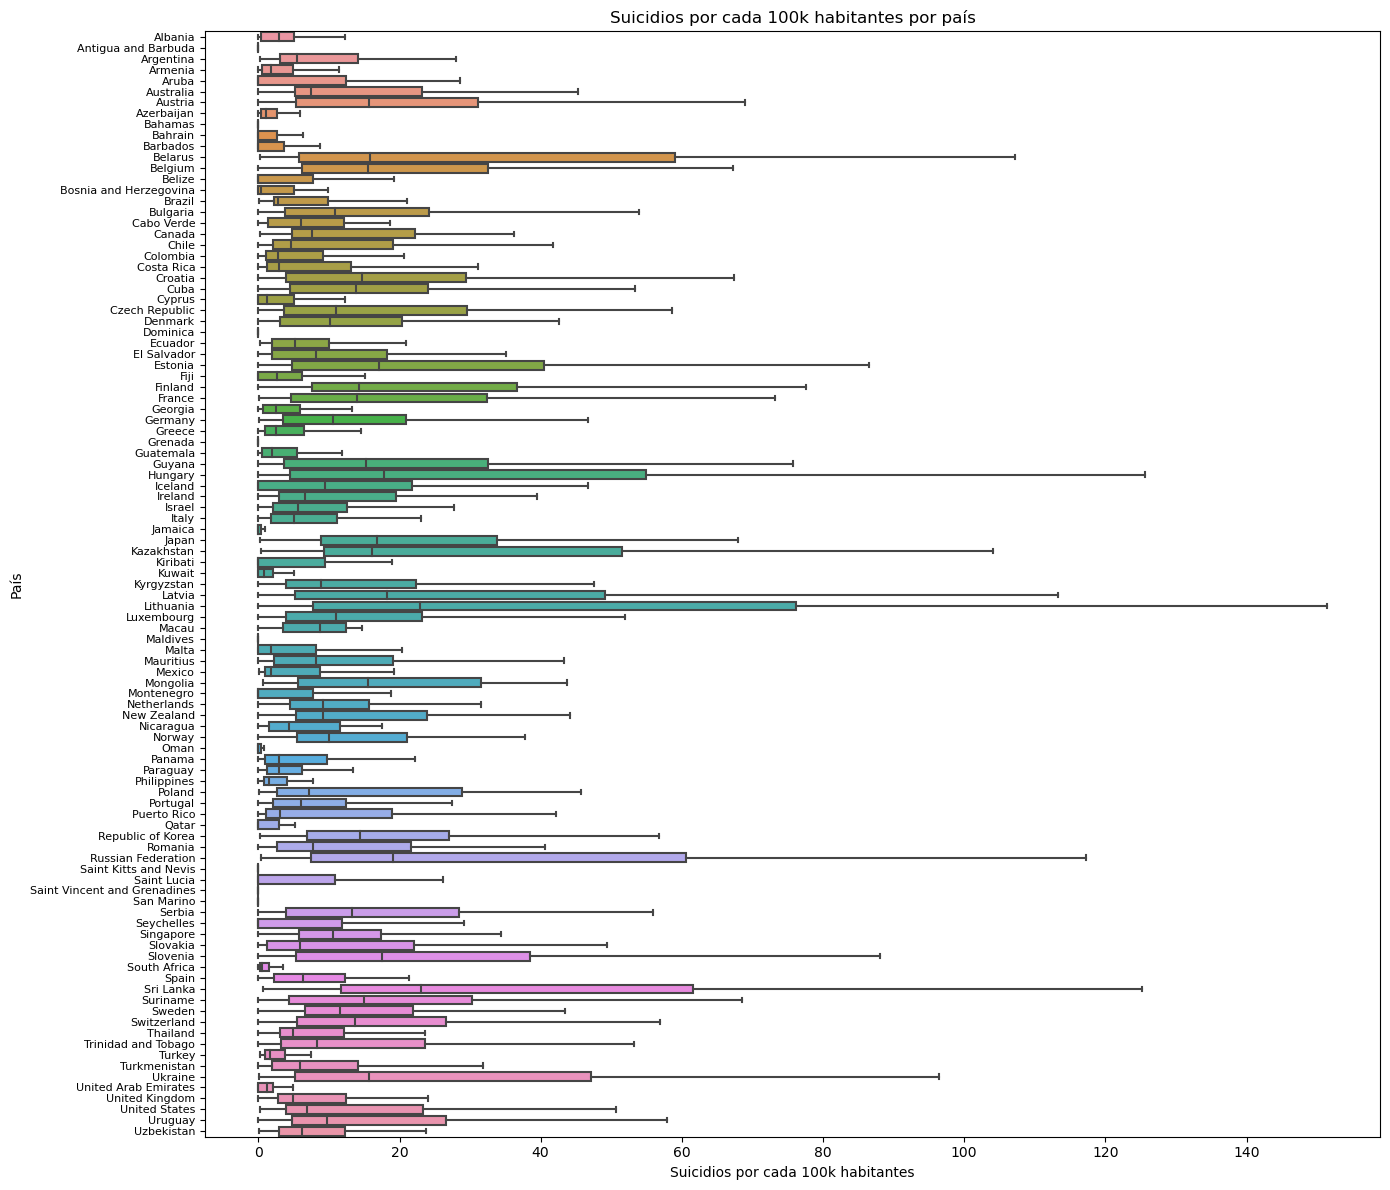

In [2]:
# Visualización: suicidios por cada 100k habitantes, por país
plt.figure(figsize=(14, 12))  # Tamaño grande para que quepan todos los países
sns.boxplot(x='suicides/100k pop', y='country', data=df, showfliers=False)
plt.title('Suicidios por cada 100k habitantes por país')
plt.xlabel('Suicidios por cada 100k habitantes')
plt.ylabel('País')
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


> **Note**: Generating the box plot may take a few moments. Please be patient while the visualization is being processed.

We have analyzed the distribution of suicide rates per 100k population by country using a boxplot. Next, please use various types of plots to further visualize and explore the data.

### Experiment with Different Visualizations:

**1. Plot a histogram to show the distribution of suicide rates across different countries.**

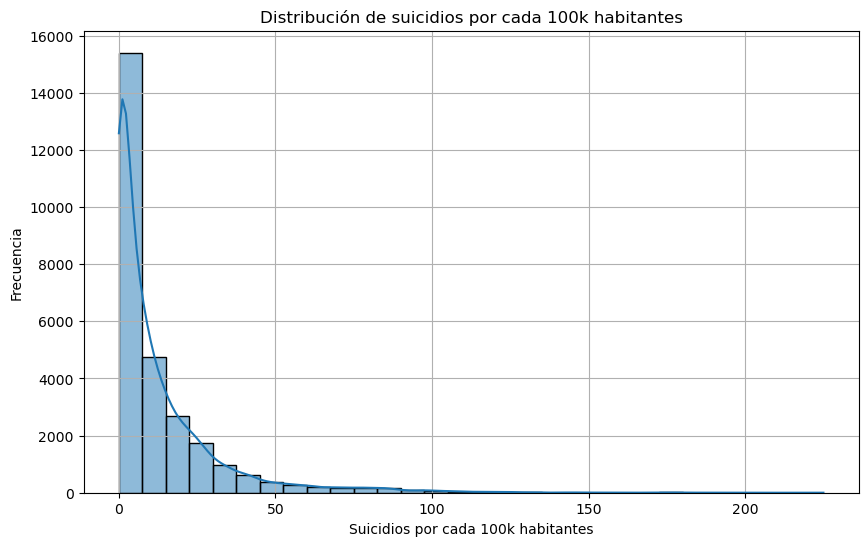

In [3]:
# Histograma general
plt.figure(figsize=(10, 6))
sns.histplot(df['suicides/100k pop'], bins=30, kde=True)
plt.title('Distribución de suicidios por cada 100k habitantes')
plt.xlabel('Suicidios por cada 100k habitantes')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()



<details><summary>Click here for the solution</summary>
 
```python
sns.histplot(df['suicides/100k pop'], bins=30, kde=True)
plt.title('Distribution of Suicide Rates per 100k Population')
plt.xlabel('Suicides per 100k Population')
plt.ylabel('Frequency')
plt.show() 
```
 
</details>

**2. Calculate and visualize the average suicide rate for each country using a bar plot.**

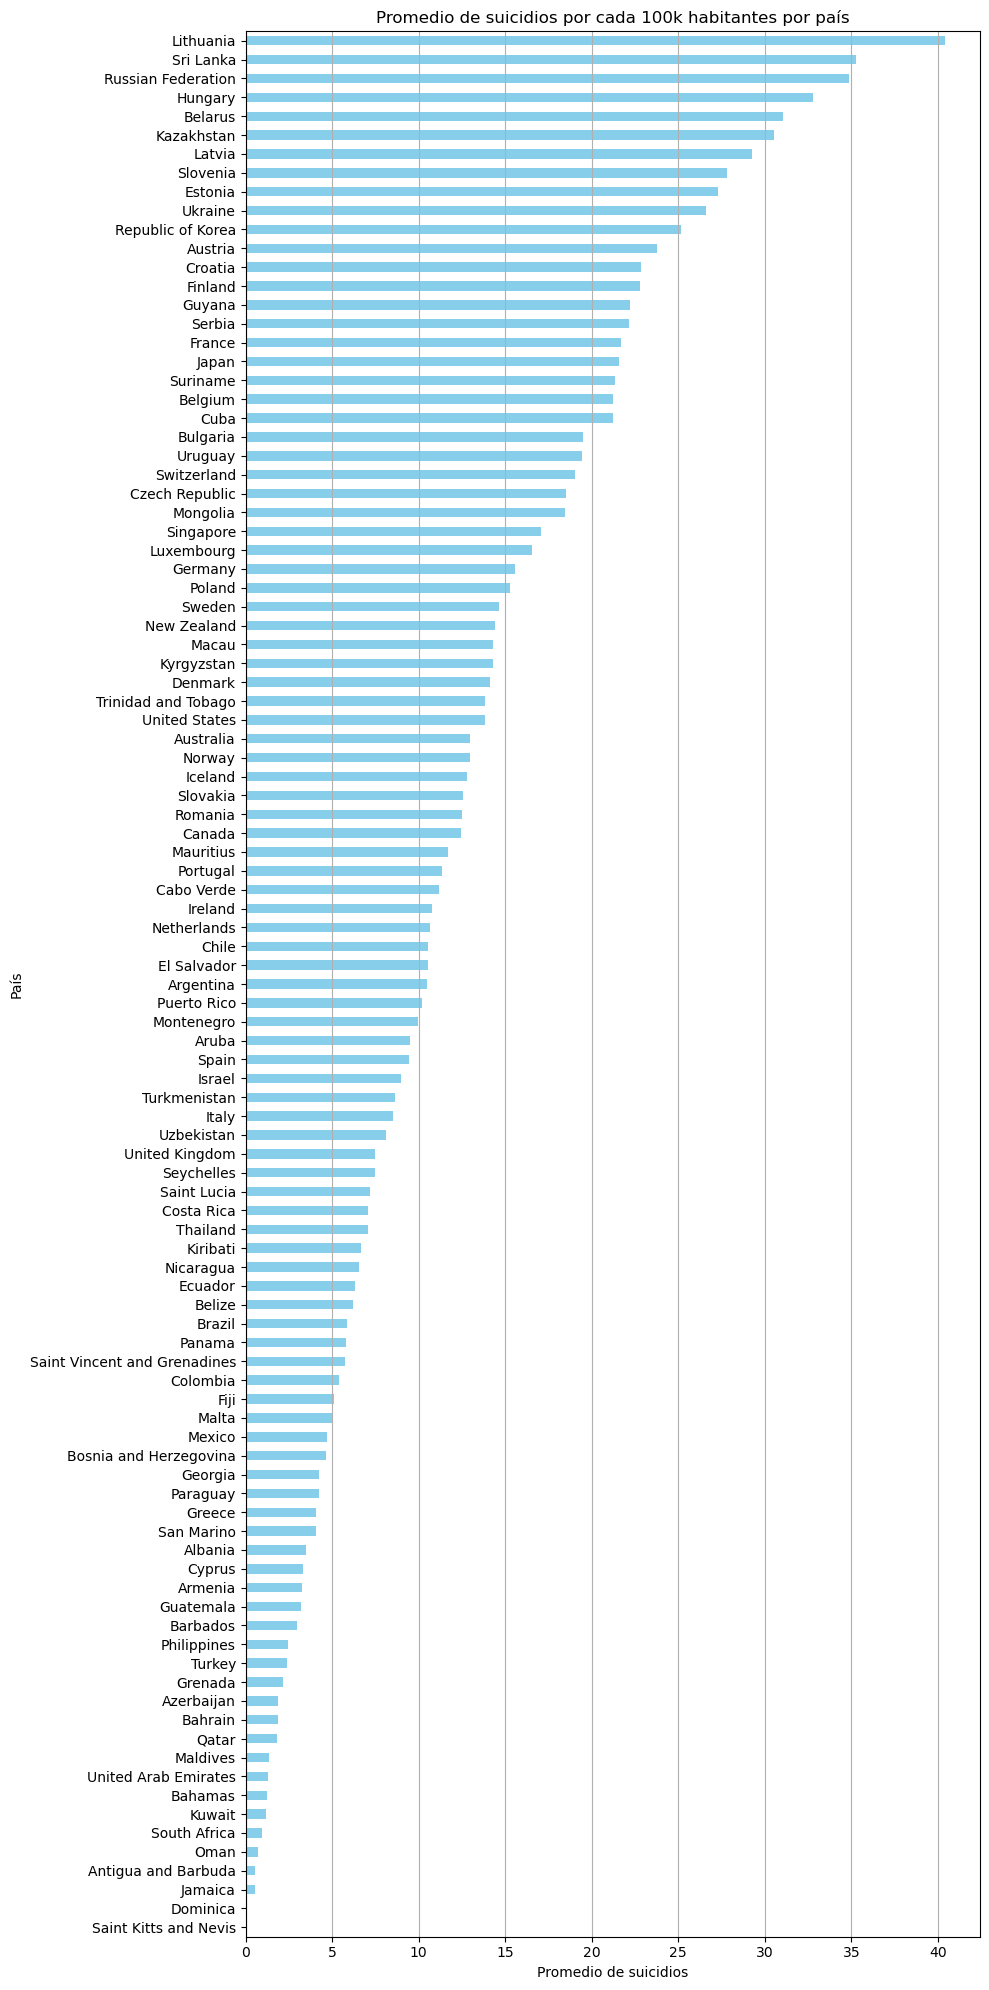

In [4]:
# Calcular la media de suicidios por país
average_suicides = df.groupby('country')['suicides/100k pop'].mean().sort_values()

# Crear el gráfico de barras
plt.figure(figsize=(10, 20))  # Aumentamos el alto para mejor visualización
average_suicides.plot(kind='barh', color='skyblue')
plt.title('Promedio de suicidios por cada 100k habitantes por país')
plt.xlabel('Promedio de suicidios')
plt.ylabel('País')
plt.grid(axis='x')
plt.tight_layout()
plt.show()



<details><summary>Click here for the solution</summary>
 
```python
average_suicides = df.groupby('country')['suicides/100k pop'].mean().sort_values()
plt.figure(figsize=(14, 10))  # Increased figure size
average_suicides.plot(kind='barh')
plt.title('Average Suicide Rates per 100k Population by Country')
plt.xlabel('Average Suicides per 100k Population')
plt.ylabel('Country')

# Adjust font size for y-axis labels to prevent overlap
plt.yticks(fontsize=8)

# Automatically adjust the layout to prevent overlapping
plt.tight_layout()

plt.show()
```
 
</details>

**3. Explore the distribution of suicide rates across different age groups using a violin plot.**

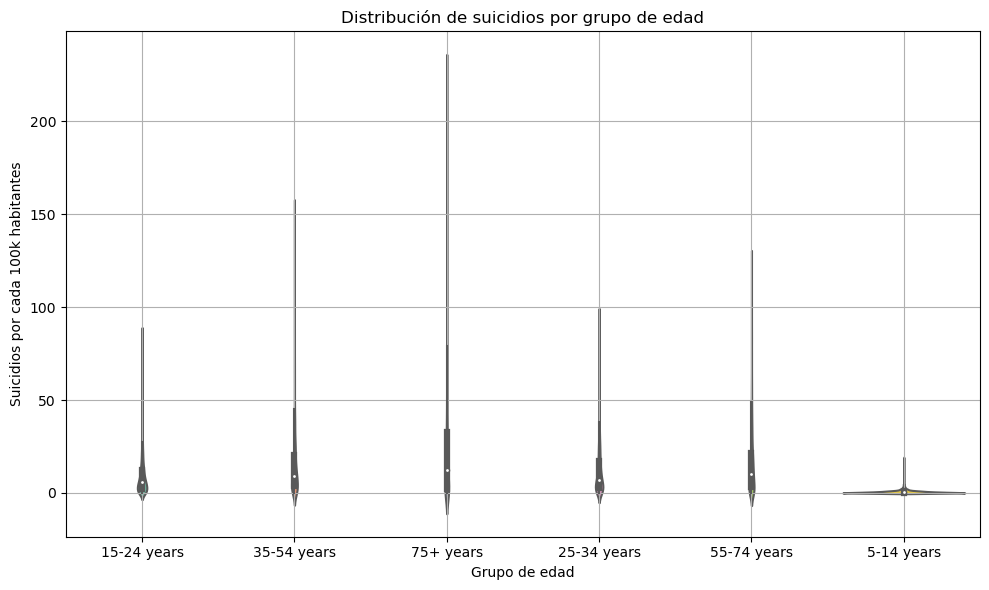

In [5]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='age', y='suicides/100k pop', data=df, palette='Set2')
plt.title('Distribución de suicidios por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Suicidios por cada 100k habitantes')
plt.grid(True)
plt.tight_layout()
plt.show()


<details><summary>Click here for the solution</summary>
 
```python
plt.figure(figsize=(12, 8))
sns.violinplot(x='age', y='suicides/100k pop', data=df)
plt.title('Distribution of Suicide Rates per 100k Population by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Suicides per 100k Population')
plt.xticks(rotation=45)
plt.show() 
```
 
</details>

### Step 3. Correlation Analysis
In this step, analyze the correlations between 'suicides/100k pop' and other features to identify which factors are most strongly associated with suicide rates. This analysis will help you understand the key influences on our target variable and how different factors relate to suicide rates.

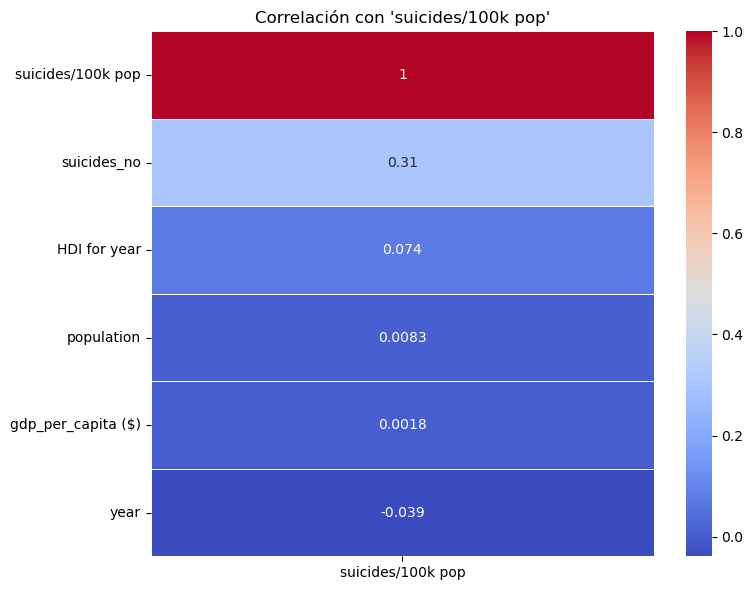

In [6]:
# Calcular la matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Mostrar la correlación de 'suicides/100k pop' con las demás variables
cor_suicides = correlation_matrix['suicides/100k pop'].sort_values(ascending=False)

# Visualizar con heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cor_suicides.to_frame(), annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title("Correlación con 'suicides/100k pop'")
plt.tight_layout()
plt.show()



<details><summary>Click here for the solution</summary>
 
```python
suicides_corr = correlation_matrix['suicides/100k pop'].sort_values(ascending=False)
print("Correlation with 'suicides/100k pop':\n", suicides_corr) 
```
 
</details>

### Insight from Correlation Analysis:

The correlation analysis provides the following insights into how different features relate to the target variable 'suicides/100k pop':

- suicides_no: Shows a moderate positive relationship, indicating that as the number of suicides increases, the suicide rate per 100k population also rises.
- HDI for year: Displays a weak positive relationship, suggesting that the Human Development Index has a limited influence on suicide rates.
- Population: Indicates a very weak relationship, implying that the total population has minimal impact on suicide rates.
- GDP per capita: Shows an extremely weak relationship, suggesting that GDP per capita has little effect on suicide rates.
- Year: Reveals a slight negative relationship, indicating a minor decrease in suicide rates over time.

These insights help identify which features have a stronger or weaker relationship with suicide rates, guiding feature selection and model interpretation.

### Step 4. Data Preprocessing
In this step, you need to clean and prepare the data for modeling. This involves handling missing values, encoding categorical variables, and scaling numerical features. Proper preprocessing is crucial to ensure that your data is suitable for building and training an effective classification model.

In [12]:
# Eliminar columnas no útiles
data_cleaned = df.drop(columns=['country-year', 'suicides/100k pop', 'HDI for year'])

# Eliminar filas con valores faltantes
data_cleaned = data_cleaned.dropna()



<details><summary>Click here for the solution</summary>
 
```python
label_encoder = LabelEncoder()
for column in ['country', 'sex', 'age', 'generation']:
    data_cleaned[column] = label_encoder.fit_transform(data_cleaned[column])
```
 
</details>

After handling categorical variables and dropping unnecessary columns, the next step is to address numeric columns that are stored as strings. Convert these columns to float types by removing any non-numeric characters, such as commas. This ensures that all numerical data is in the appropriate format for analysis and modeling.

In [13]:
from sklearn.preprocessing import LabelEncoder

# Codificar columnas categóricas
label_encoder = LabelEncoder()
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

for col in categorical_columns:
    data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])



<details><summary>Click here for the solution</summary>
 
```python
for column in non_numeric_columns:
    try:
        data_cleaned[column] = data_cleaned[column].replace({',': ''}, regex=True).astype(float)
    except ValueError:
        print(f"Skipping column: {column}")
```
 
</details>

Once the data is cleaned and encoded, scaling the numerical features is often beneficial. Scaling standardizes the range of feature values, which can enhance the performance and convergence speed of machine learning algorithms. In this step, use the `StandardScaler` to scale the `population` and `gdp_per_capita (S)` features, ensuring they have a mean of 0 and a standard deviation of 1.

In [14]:
# Convertir columnas tipo 'object' que deberían ser numéricas
non_numeric_columns = data_cleaned.columns[data_cleaned.dtypes == 'object']

for col in non_numeric_columns:
    data_cleaned[col] = data_cleaned[col].str.replace(',', '').astype(float)



<details><summary>Click here for the solution</summary>
 
```python
data_cleaned[['population', 'gdp_per_capita ($)']] = scaler.fit_transform(data_cleaned[['population', 'gdp_per_capita ($)']]) 
```
 
</details>

In [15]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['population', 'gdp_per_capita ($)']

data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])


<details><summary>Click here for the solution</summary>
 
```python
data_cleaned.head() 
```
 
</details>

With the numerical features scaled, you can now proceed to define your target variable. Create a binary variable `high_risk` to classify the data based on whether the number of suicides exceeds a threshold of 20. This target variable will help guide your classification model in predicting high-risk cases.

In [16]:
# Crear variable binaria 1 si suicidios > 20
data_cleaned['high_risk'] = (df.loc[data_cleaned.index, 'suicides_no'] > 20).astype(int)



<details><summary>Click here for the solution</summary>
 
```python
data_cleaned['high_risk'] = (data_cleaned['suicides_no'] > 20).astype(int) 
```
 
</details>

Having defined the binary target variable `high_risk`—where 1 represents a high number of suicides (greater than 20) and 0 represents a lower number—you are now ready to split the data into training and testing sets. This split is essential for training your classification model and evaluating its performance on unseen data.

In [17]:

# Separar características (X) y variable objetivo (y)
X = data_cleaned.drop('high_risk', axis=1)
y = data_cleaned['high_risk']

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<details><summary>Click here for the solution</summary>
 
```python
X = data_cleaned.drop(columns=['suicides_no', 'high_risk'])
y = data_cleaned['high_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
```
 
</details>

With the data split into training and testing sets, you can now proceed to train your classification model. Use the training data to fit the model, and then evaluate its performance on the testing data. This process allows you to assess how well the model generalizes to new, unseen data and make any necessary adjustments.

In [18]:
# Entrenar el modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

<details><summary>Click here for the solution</summary>
 
```python
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train) 
```
 
</details>

### Step 5: Evaluate the model
After training the Random Forest model on the training data, the next step is to evaluate its performance. Use the testing set to make predictions and assess the model’s accuracy, along with other performance metrics such as precision, recall, and F1-score. This evaluation helps you understand how well the model classifies new data and whether it meets your objectives.

In [19]:

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0

Matriz de confusión:
[[2621    0]
 [   0 2943]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2621
           1       1.00      1.00      1.00      2943

    accuracy                           1.00      5564
   macro avg       1.00      1.00      1.00      5564
weighted avg       1.00      1.00      1.00      5564



<details><summary>Click here for the solution</summary>
 
```python
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report) 
```
 
</details>

With the model evaluated and performance metrics obtained, the next step is to analyze feature importance. Random Forest models offer insights into which features have the most significant impact on predictions. By examining feature importance, you can identify the key factors influencing suicide risk, guiding further analysis and model refinement.

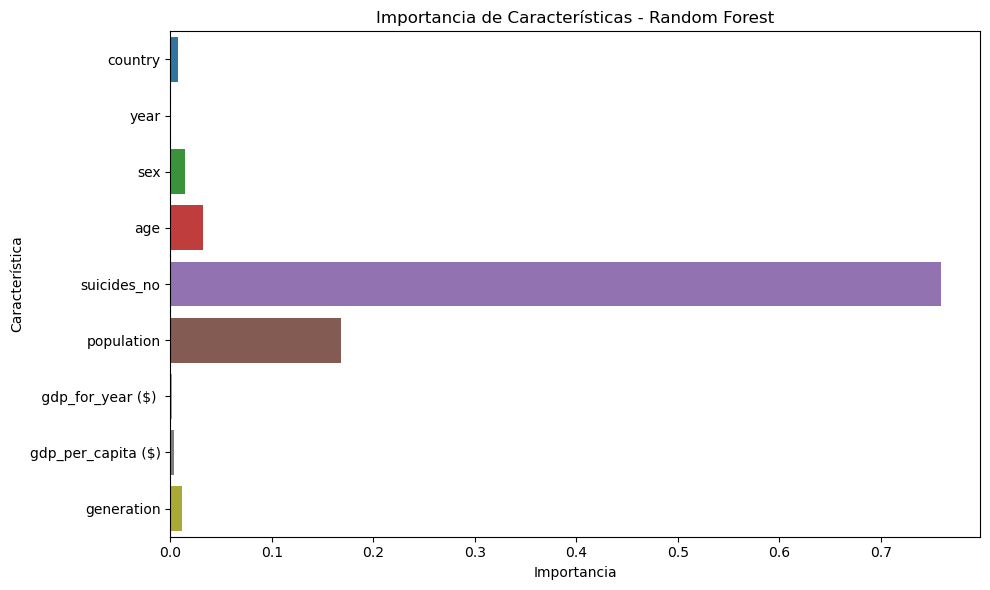

In [20]:
# Importancia de características
importances = model.feature_importances_
features = X.columns

# Crear gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Importancia de Características - Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()


<details><summary>Click here for the solution</summary>
 
```python
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
print(importance_df.sort_values(by='Importance', ascending=False)) 
```
 
</details>

The feature importance analysis reveals which features most significantly impact predicting suicide risk. Features with higher importance scores are crucial for the model, while those with lower scores contribute less. This understanding helps in focusing on key features and refining the model for improved performance.

### Summary:
In this lab, you built and evaluated a Random Forest model to predict high-risk suicide rates. After preprocessing the data and training the model, you achieved strong performance and identified key features that significantly impact predictions. This insight will guide further model refinement and improvements.